In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/contractions-library-python/textsearch-0.0.24-py2.py3-none-any.whl
/kaggle/input/contractions-library-python/contractions-0.1.73-py2.py3-none-any.whl
/kaggle/input/contractions-library-python/pyahocorasick-2.1.0-cp311-cp311-macosx_10_9_universal2.whl
/kaggle/input/contractions-library-python/anyascii-0.3.2-py3-none-any.whl
/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


In [2]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [3]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.1 MB/s eta 0:00:00


In [4]:
!pip install tensorflow

In [5]:
!pip install transformers

# 1. Introduction

## 1.2. Objective: Sentiment Analysis & Insights for E-commerce
The **primary** goal is to **classify customer reviews** as **positive, negavtive, or neutral** using **Sentiment Analysis**.

**Secondary** objectives:
* Identify trends in customer feedback across different product categories
* Understand how review sentiment impacts **sales * brand perception**
* Suggest strategies for product improvement and marketing campaigns

## 1.1 Overview of the Project
* The project focuses on analysing customer reviews for women's clothing in an e-commerce setting
* The goal is to extract insights using **Natural Language Processing (NLP)** and **Machine Learning (ML)** techniques.

## 1.3. Importance of Customer Reviews in Fashion Retail
* Customer reviews play a vital role in e-commerc, inlfuencing purchasing decisions.
* Challenges in analysing reviews manually (volume, subjectivity, unstructured text).
* The need for automated ML-based sentiment analysis for businesses to make data-driven decisions.

# 2. Data Understanding

## 2.1. Dataset Overview
* The dataset contains 23,486 rows with 10 given features.
* It includes structured (categorical, numerical) and unstructured (text) data.
* The primary focus will be on *Review Text* and *Rating* to analyse customer sentiment.

## 2.2 Data Dictionary

| Feature Name           | Data Type   | Description |
|------------------------|------------|-------------|
| Clothing ID           | Integer    | Unique identifier for each piece of clothing. |
| Age                  | Integer    | Age of the reviewer. |
| Title                | String     | Title of the review. |
| Review Text          | String     | Full text of the review. |
| Rating               | Integer    | Rating score from 1 (Worst) to 5 (Best). |
| Recommended IND      | Binary     | 1 = Recommended, 0 = Not Recommended |
| Positive Feedback Count | Integer  | Number of users who found the review helpful. |
| Division Name        | Categorical | High-level clothing category |
| Department Name      | Categorical | More specific department |
| Class Name          | Categorical | Subcategory of clothing. |


## 2.3. Target Variable & Problem Statement
**Target Variable** : Sentiment Classification (Positive, Neutral, Negative).

**Defining Sentiment Labels**:
* **Positive Sentiment**: Rating 4 & 5
* **Neutral Sentiment** : Rating 3
* **Negative Sentiment**: Rating 1 & 2

**Goal**: Build a Machine Learning Model that predicts the sentiment based on review text and other features.

# 3. Exploratory Data Analysis (EDA)
This section focuses on **data distribution, patterns, and relationships**.

## 3.1. Data Cleaning

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df.dataframeName = 'Womens Clothing E-Commerce Reviews.csv'
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [9]:
# Statistical summary
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


### 3.1.1. Handling Missing Values

In [10]:
# Counts of missing values
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

**Potential issues and Solutions**:
* ***Title***: Not critical, this column won't be used.
* ***Review Text***: Missing values should be dropped since it's crucial for sentiment analysis.
*  ***Division Name***, ***Department Name***, ***Class Name***: Use the most common category (mode) to fill the missing value

In [11]:
# Drop Missing Values in 'Review Text'
df = df.dropna(subset = ['Review Text'])

In [12]:
# Drop column 'Title'
df = df.drop(columns = ['Title', 'Clothing ID'])

In [13]:
# Using the most common category (mode) to fill missing value for Categorical columns
df['Division Name'] = df['Division Name'].fillna(df['Division Name'].mode()[0])
df['Department Name'] = df['Department Name'].fillna(df['Department Name'].mode()[0])
df['Class Name'] = df['Class Name'].fillna(df['Class Name'].mode()[0])


In [14]:
# Final check for missing values
df.isnull().sum()

Unnamed: 0                 0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### 3.1.2. Handling Duplicates and Outliers

In [15]:
# Check the duplicates
print(df.duplicated().sum())

0


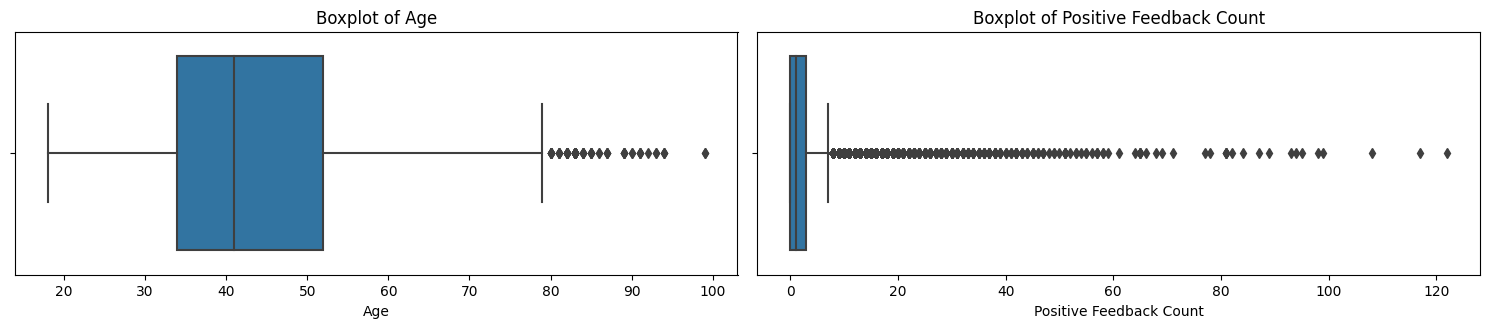

In [16]:
# Check the outliers
num_cols = ['Age', 'Positive Feedback Count']
plt.figure(figsize = (15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [17]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_age = detect_outliers_iqr(df, 'Age')
outliers_feedback = detect_outliers_iqr(df, 'Positive Feedback Count')

print( f'Outliers in Age: {len(outliers_age)}')
print(f'Outliers in Positive Feedback Count: {len(outliers_feedback)}')

Outliers in Age: 108
Outliers in Positive Feedback Count: 2147


To handle the Outliers: 
* ***Age***: Keep only values lower than 80
* ***Positive Feedback Count***: Use Log Transformation to reduce the impact of outliers

In [18]:
# Handling Outliers in 'Age'
df = df[(df['Age'] <80)]

In [19]:
# Handling Outlier in Positive Feedback Count:
df['Positive Feedback Count'] = np.log1p(df['Positive Feedback Count'])

In [20]:
outliers_age = detect_outliers_iqr(df, 'Age')
outliers_feedback = detect_outliers_iqr(df, 'Positive Feedback Count')

print( f'Outliers in Age: {len(outliers_age)}')
print(f'Outliers in Positive Feedback Count: {len(outliers_feedback)}')

Outliers in Age: 0
Outliers in Positive Feedback Count: 154


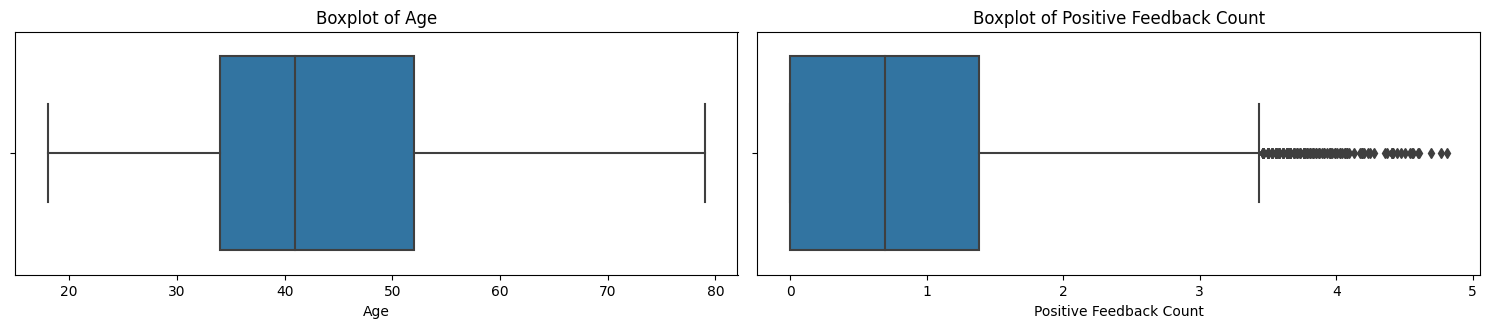

In [21]:
plt.figure(figsize = (15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

Because we are not sure how important the rest of outliers, so I will check the impact of Outliers on Model performance, by training dataset with and without outliers on a simple baseline model, then compare its performance. 

#### *Training and evaluating model with Outliers*

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error as MSE

In [23]:
df.columns

Index(['Unnamed: 0', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [24]:
# Select 'Recommended IND' as target variable
y = df['Recommended IND']

# Select features
X = df[['Age', 'Rating', 'Positive Feedback Count']]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train a baseline model (Random Forest)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate performance
accuracy_with_outliers = accuracy_score(y_test, y_pred)
mae_with_outliers = MSE(y_test, y_pred)

print(f"Model Accuracy (With Outliers): {accuracy_with_outliers:.4f}")
print(f"Mean Absolute Error (With Outlier): {mae_with_outliers:.4f}")


Model Accuracy (With Outliers): 0.9263
Mean Absolute Error (With Outlier): 0.0737


#### *Traning and evalutating models without Outliers*

In [25]:
# Identify and Remove outliers using Z-score
from scipy.stats import zscore

# Compute Z-score for Positive Feedback Count
df['Positive Feedback Count Z'] = zscore(df['Positive Feedback Count'])

# Remove remaining outliers
df_cleaned = df[df['Positive Feedback Count Z'].abs() < 3]


In [26]:
# Define new features and target variable
X = df_cleaned[['Age', 'Rating', 'Positive Feedback Count']]
y = df_cleaned['Recommended IND']

# Train on model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate performance
accuracy_without_outliers = accuracy_score(y_test, y_pred)
mae_without_outliers = MSE(y_test, y_pred)

print(f"Model Accuracy (Without Outliers): {accuracy_without_outliers:.4f}")
print(f"Mean Absolute Error (Without Outliers): {mae_without_outliers:.4f}")

Model Accuracy (Without Outliers): 0.9363
Mean Absolute Error (Without Outliers): 0.0637


##### **Compare results:**
| **Metric**  | **With Outliers** | **Without Outliers** |
|------------|----------------|----------------|
| **Accuracy** | 92.63% | 93.63% |
| **MAE** | 0.0737 |0.0637 |

##### **Analysis:**  
-  **Accuracy** increased from 92.63% to 93.63% after removing outliers, indicating a slight improvement in model performance.
-  **MAE** decreased from 0.0737 to 0.0637, meaning the model's prediction errors became smaller.

##### **Conclusion:**
- Since both **accuracy improved** and **error decreased**, removing outliers was beneficial for the model
- The impact is small but positive, suggesting that while outliers were not severely affecting performance, their removal still helped refine the model.
=> We choose to remove outliers

In [27]:
# Final check for Outliers in 'Positve Feedback Count'
outliers_feedback = detect_outliers_iqr(df_cleaned, 'Positive Feedback Count')

print(f'Outliers in Positive Feedback Count: {len(outliers_feedback)}')

Outliers in Positive Feedback Count: 0


In [28]:
# Rename dataset
df1 = df_cleaned.drop(columns = ['Positive Feedback Count'])
df1.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Positive Feedback Count Z
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,-0.863903
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,0.938966
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,-0.863903
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,-0.863903
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,1.315878


In [29]:
df1.shape


(22379, 9)

In [30]:
df1.isnull().sum()

Unnamed: 0                   0
Age                          0
Review Text                  0
Rating                       0
Recommended IND              0
Division Name                0
Department Name              0
Class Name                   0
Positive Feedback Count Z    0
dtype: int64

## 3.2. Univariate Analysis

### 3.2.1. Distribution of Ratings

* Plot ratings distribution to see customer sentiment trends

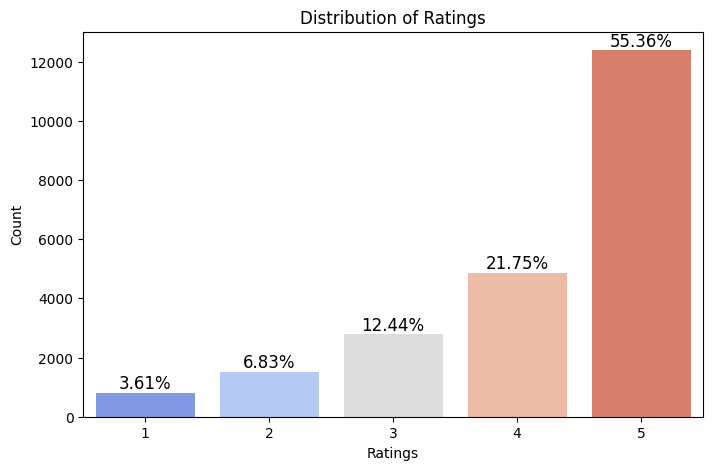

In [31]:
# Calculate percentage of each rating category
rating_counts = df1['Rating'].value_counts().sort_index()  # Ensure order is correct
rating_percent = (rating_counts / len(df1)) * 100  # Convert to percentage

# Create the count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df1['Rating'], palette='coolwarm', order=rating_counts.index)

# Add percentage labels on bars
for p, percentage in zip(ax.patches, rating_percent):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%',  # Format percentage with 2 decimal places
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom', fontsize=12, color='black')


plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

* Most ratings are positive (4-5 stars)
* There are only ~10% negative ratings

### 3.2.2. Distribution of Age

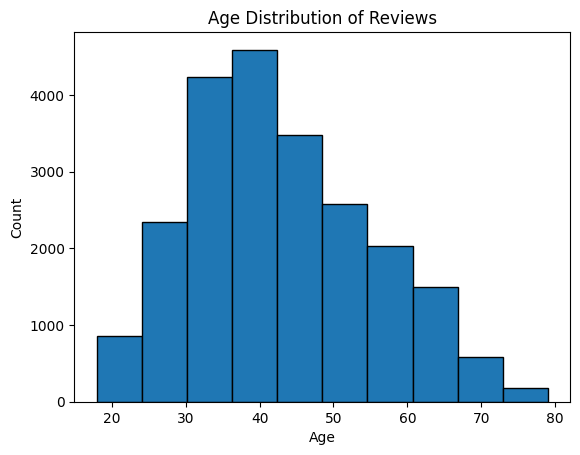

In [32]:
# Plot the age distribution
plt.hist(df1['Age'], bins = 10, edgecolor = 'black')
plt.title('Age Distribution of Reviews')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 3.3. Bivariate Analysis

### Relationship between Rating & Recommendation
* Hypothesis: Higher rating should have more recommendations (*Recommended IND* = 1)

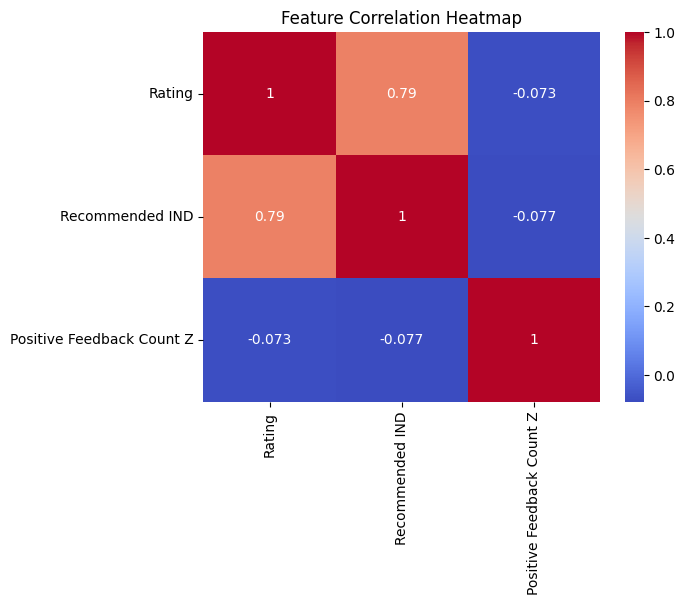

In [33]:
# Plot heatmap correlation
corr_matrix = df1[['Rating', 'Recommended IND', 'Positive Feedback Count Z']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 3.4. Text Analysis



### 3.4.1 Word Clouds

#### **Positive Review Words**

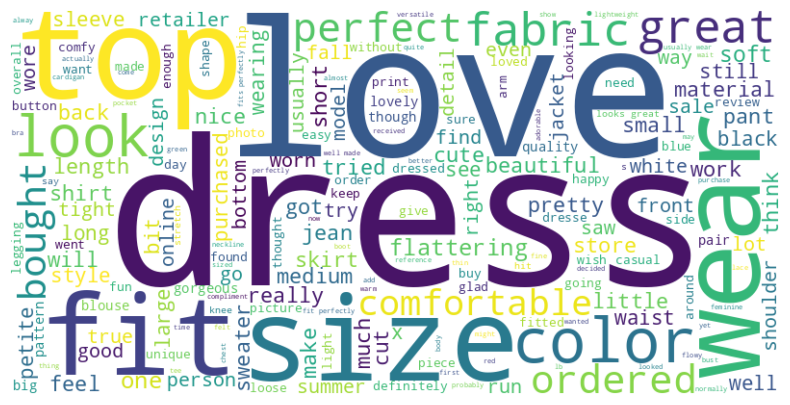

In [34]:
from wordcloud import WordCloud

positive_reviews = " ".join(df1[df1['Rating'] > 3]['Review Text'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_reviews)

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### **Negative Review Words**

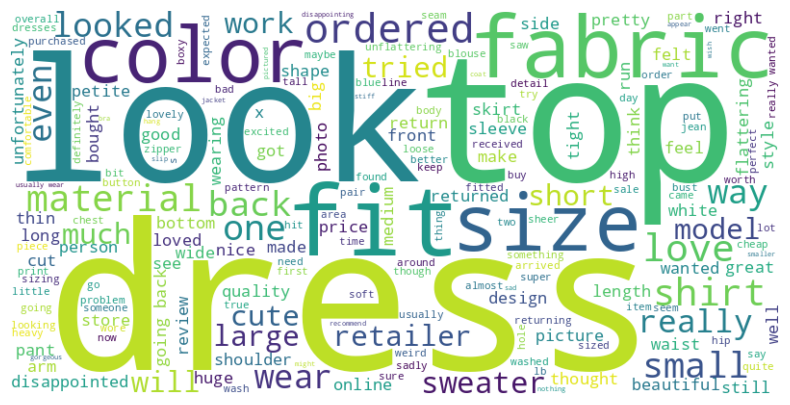

In [35]:
negative_reviews = " ".join(df1[df1['Rating'] < 3]['Review Text'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(negative_reviews)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 3.4.2. Sentiment Levels

**Inspecting the length of Review Text**

In [36]:
length_review = df1['Review Text'].str.len()
print("The longest review size is: ", max(length_review))
print("The shortest review size is ", min(length_review))

The longest review size is:  508
The shortest review size is  9


With the size above, the **VADER (Valence Aware Dictionart and Sentiment Reasoner)** method with be used to evaluate the sentiment level. 

**Import necessary libraries**

In [37]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string, re
import contractions

/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


**Sentiment Levels**

In [38]:
sia = SentimentIntensityAnalyzer()
df1['Sentiment Score'] = df1['Review Text'].apply(lambda text: sia.polarity_scores(text)['compound'])
df1['Sentiment Label'] = df1['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
print(df1['Sentiment Label'].value_counts())

Sentiment Label
Positive    20836
Negative     1406
Neutral       137
Name: count, dtype: int64


### 3.4.3. Sentiment Distribution

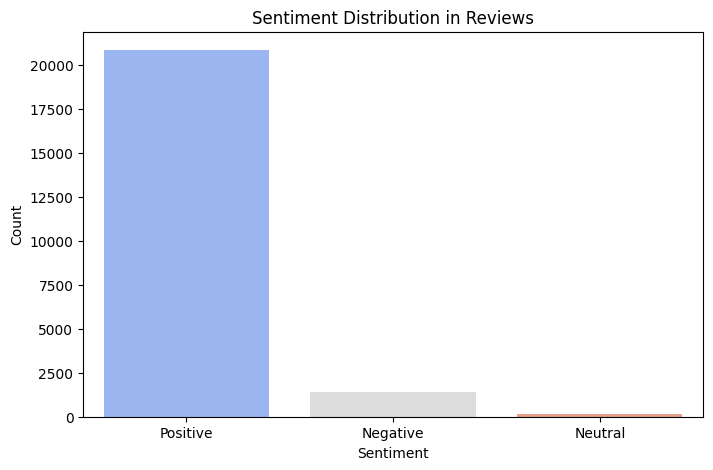

In [39]:
plt.figure(figsize = (8,5))
sns.countplot(x = df1['Sentiment Label'], palette = 'coolwarm')
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#### **Sentiment Distribution Across Division**

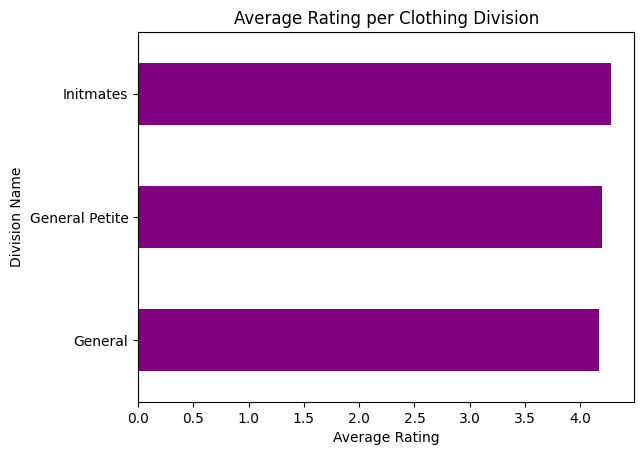

In [40]:
df1.groupby('Division Name')['Rating'].mean().sort_values().plot(kind = 'barh', color = 'purple')
plt.xlabel('Average Rating')
plt.ylabel('Division Name')
plt.title('Average Rating per Clothing Division')
plt.show()

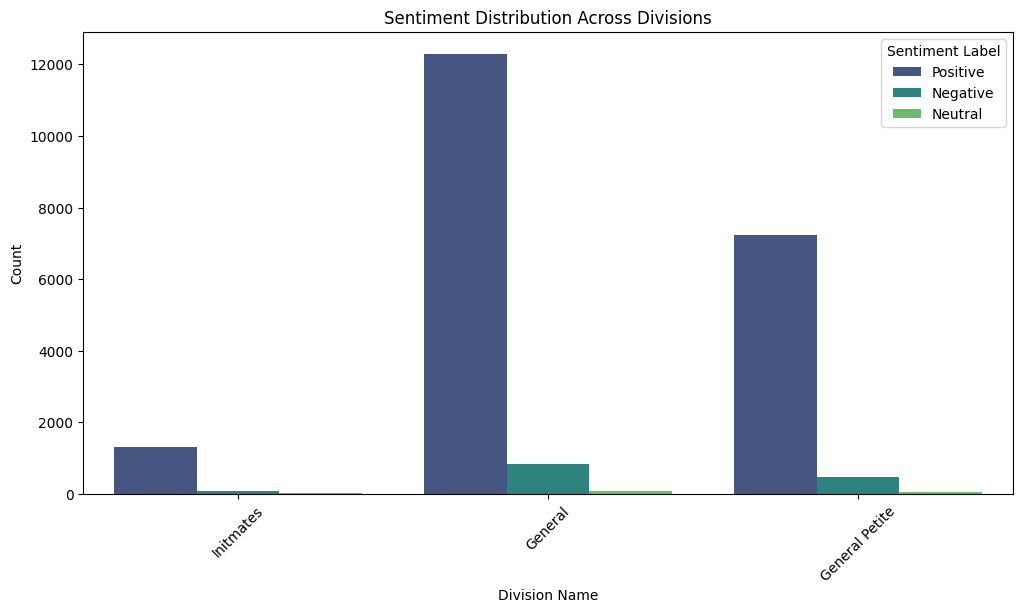

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='Division Name', hue='Sentiment Label', palette='viridis')

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.title("Sentiment Distribution Across Divisions")
plt.legend(title="Sentiment Label")
plt.show()

#### **Sentiment Distribution Across Categories**

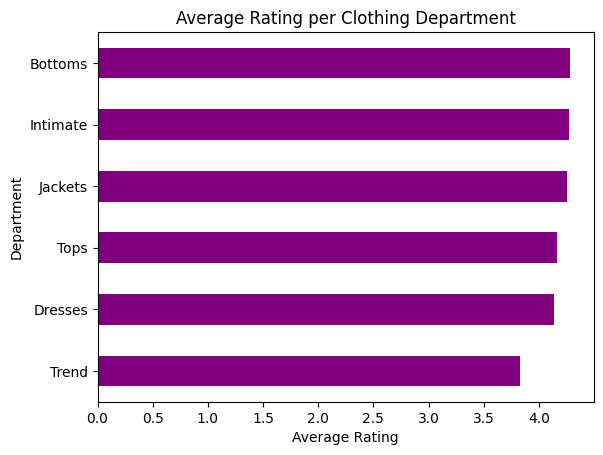

In [42]:
df1.groupby('Department Name')['Rating'].mean().sort_values().plot(kind = 'barh', color = 'purple')
plt.xlabel('Average Rating')
plt.ylabel('Department')
plt.title('Average Rating per Clothing Department')
plt.show()

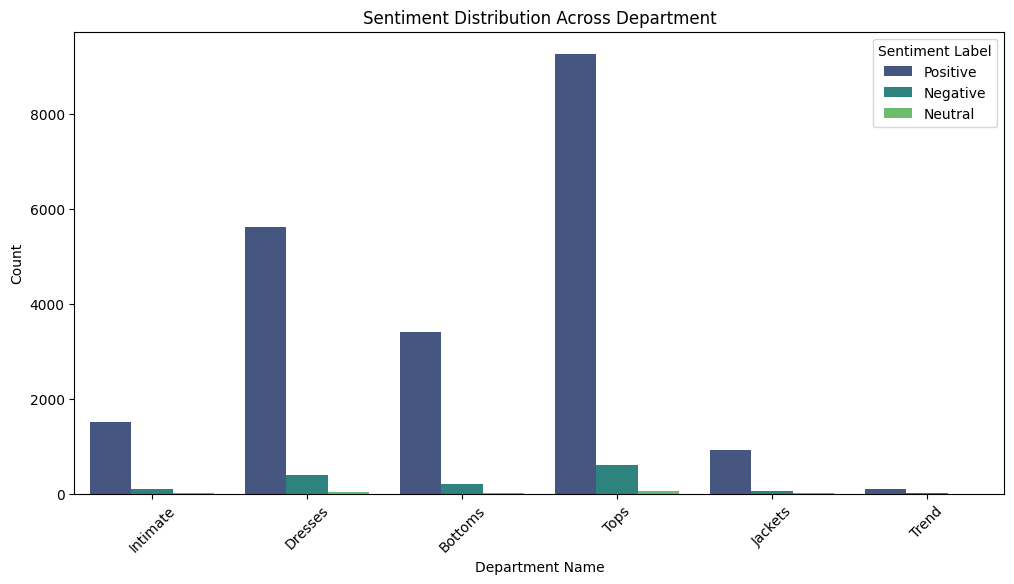

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='Department Name', hue='Sentiment Label', palette='viridis')

plt.xticks(rotation=45) 
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Sentiment Distribution Across Department")
plt.legend(title="Sentiment Label")
plt.show()

#### **Sentiment Distribution Across Sub-categories**

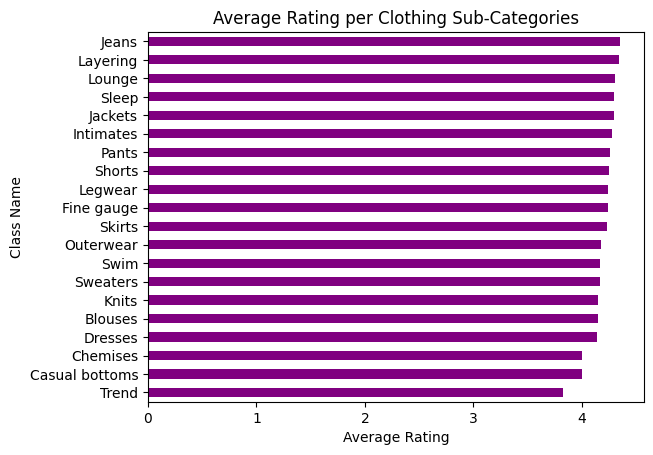

In [44]:
df1.groupby('Class Name')['Rating'].mean().sort_values().plot(kind = 'barh', color = 'purple')
plt.xlabel('Average Rating')
plt.ylabel('Class Name')
plt.title('Average Rating per Clothing Sub-Categories')
plt.show()

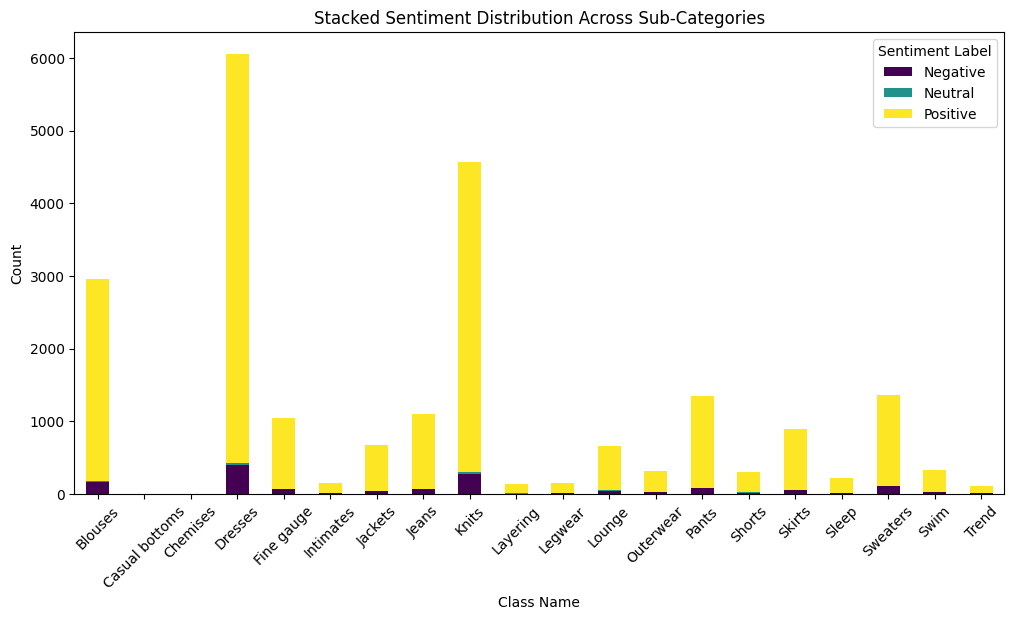

In [45]:

sentiment_counts = df1.groupby(['Class Name', 'Sentiment Label']).size().unstack()

# Plot
sentiment_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))

plt.xlabel("Class Name")
plt.ylabel("Count")
plt.title("Stacked Sentiment Distribution Across Sub-Categories")
plt.legend(title="Sentiment Label")
plt.xticks(rotation=45)
plt.show()

# 4. Data Preprocessing

## 4.1. Text Preprocessing

In [46]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)


def get_wordnet_pos(treebank_tag):
    """
    Convert treebank POS tags to WordNet POS tags (e.g., 'NN' -> 'n', 'VB' -> 'v')
    """
    if treebank_tag.startswith('J'):
        return 'a'  # Adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # Verb
    elif treebank_tag.startswith('N'):
        return 'n'  # Noun
    elif treebank_tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun if unknown

def clean_text(text):
    text = expand_contractions(text)  # Expand contractions like "can't" -> "cannot"
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters (except spaces)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    
    # Tokenize words and get POS tags
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    
    # Lemmatize based on POS tags
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags if word not in stop_words and word.isalpha()]
    
    return " ".join(words)

df1['Cleaned Review Text'] = df1['Review Text'].apply(clean_text)

# Display the cleaned text
print(df1.head())

   Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33  Absolutely wonderful - silky and sexy and comf...       4   
1           1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2           2   60  I had such high hopes for this dress and reall...       3   
3           3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4           4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND   Division Name Department Name Class Name  \
0                1       Initmates        Intimate  Intimates   
1                1         General         Dresses    Dresses   
2                0         General         Dresses    Dresses   
3                1  General Petite         Bottoms      Pants   
4                1         General            Tops    Blouses   

   Positive Feedback Count Z  Sentiment Score Sentiment Label  \
0                  -0.863903           0.8932        Posi

## 4.2. Feature Engineering

### Convert Text data into Numerical


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df1['Cleaned Review Text'])

# Convert TF-IDF matrix to dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf.get_feature_names_out())
print(tfidf_df.head())

   able  absolutely  accentuate  across  actual  actually  add  addition  \
0   0.0    0.385647         0.0     0.0     0.0       0.0  0.0       0.0   
1   0.0    0.000000         0.0     0.0     0.0       0.0  0.0       0.0   
2   0.0    0.000000         0.0     0.0     0.0       0.0  0.0       0.0   
3   0.0    0.000000         0.0     0.0     0.0       0.0  0.0       0.0   
4   0.0    0.000000         0.0     0.0     0.0       0.0  0.0       0.0   

   adjust  adjustable  ...   xx  xxsp  year  yellow  yes  yesterday  yet  \
0     0.0    0.000000  ...  0.0   0.0   0.0     0.0  0.0        0.0  0.0   
1     0.0    0.000000  ...  0.0   0.0   0.0     0.0  0.0        0.0  0.0   
2     0.0    0.000000  ...  0.0   0.0   0.0     0.0  0.0        0.0  0.0   
3     0.0    0.000000  ...  0.0   0.0   0.0     0.0  0.0        0.0  0.0   
4     0.0    0.376311  ...  0.0   0.0   0.0     0.0  0.0        0.0  0.0   

   young       zip    zipper  
0    0.0  0.000000  0.000000  
1    0.0  0.000000  0.00

In [48]:
tfidf_df.shape

(22379, 1000)

## 4.3. Encoding Categorical Variables

### **Label Encoding**


In [49]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'sparse' -> 'sparse_output' to avoid warning

# Fit and transform categorical features
encoded_features = encoder.fit_transform(df1[['Sentiment Label', 'Division Name', 'Department Name', 'Class Name']])

# Fix feature name mismatch issue
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sentiment Label', 'Division Name', 'Department Name', 'Class Name']))

# Concatenate with original dataframe (excluding old categorical columns)
df1 = pd.concat([df1.drop(columns=['Sentiment Label', 'Division Name', 'Department Name', 'Class Name']), encoded_df], axis=1)

print(df1.head())


   Unnamed: 0   Age                                        Review Text  \
0         0.0  33.0  Absolutely wonderful - silky and sexy and comf...   
1         1.0  34.0  Love this dress!  it's sooo pretty.  i happene...   
2         2.0  60.0  I had such high hopes for this dress and reall...   
3         3.0  50.0  I love, love, love this jumpsuit. it's fun, fl...   
4         4.0  47.0  This shirt is very flattering to all due to th...   

   Rating  Recommended IND  Positive Feedback Count Z  Sentiment Score  \
0     4.0              1.0                  -0.863903           0.8932   
1     5.0              1.0                   0.938966           0.9729   
2     3.0              0.0                  -0.863903           0.9427   
3     5.0              1.0                  -0.863903           0.5727   
4     5.0              1.0                   1.315878           0.9291   

                                 Cleaned Review Text  Sentiment Label_Neutral  \
0        absolutely wonderful

In [50]:
encoded_df.shape

(22379, 28)

In [51]:
df1.shape

(23437, 36)

In [52]:
df1 = df1.dropna()
df1.shape

(21321, 36)

### **Standardization**

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform both 'Age' and 'Rating' together
df1[['Age_scaled', 'Rating_scaled']] = scaler.fit_transform(df1[['Age', 'Rating']])

# Drop original columns
df1.drop(columns=['Age', 'Rating'], inplace=True)

print(df1[['Age_scaled', 'Rating_scaled']])

       Age_scaled  Rating_scaled
0       -0.836278      -0.169158
1       -0.753196       0.729126
2        1.406933      -1.067441
3        0.576114       0.729126
4        0.326868       0.729126
...           ...            ...
22374   -0.919360      -0.169158
22375    0.825360       0.729126
22376    0.659196       0.729126
22377    1.573097       0.729126
22378   -0.337787      -0.169158

[21321 rows x 2 columns]


In [54]:
df1.shape

(21321, 36)

In [55]:
df1.isnull().sum()

Unnamed: 0                      0
Review Text                     0
Recommended IND                 0
Positive Feedback Count Z       0
Sentiment Score                 0
Cleaned Review Text             0
Sentiment Label_Neutral         0
Sentiment Label_Positive        0
Division Name_General Petite    0
Division Name_Initmates         0
Department Name_Dresses         0
Department Name_Intimate        0
Department Name_Jackets         0
Department Name_Tops            0
Department Name_Trend           0
Class Name_Casual bottoms       0
Class Name_Chemises             0
Class Name_Dresses              0
Class Name_Fine gauge           0
Class Name_Intimates            0
Class Name_Jackets              0
Class Name_Jeans                0
Class Name_Knits                0
Class Name_Layering             0
Class Name_Legwear              0
Class Name_Lounge               0
Class Name_Outerwear            0
Class Name_Pants                0
Class Name_Shorts               0
Class Name_Ski

In [56]:
df1.shape

(21321, 36)

## 4.4. Feature Importance

In [57]:
# Define feature matrix X before doing training models
df1 = pd.concat([df1.reset_index(drop = True), tfidf_df.reset_index(drop = True)], axis = 1)
X = df1.drop(columns = ['Review Text', 'Cleaned Review Text', 'Recommended IND'])
print(X.head())

# Define target variable y
y = df1['Recommended IND']

   Unnamed: 0  Positive Feedback Count Z  Sentiment Score  \
0         0.0                  -0.863903           0.8932   
1         1.0                   0.938966           0.9729   
2         2.0                  -0.863903           0.9427   
3         3.0                  -0.863903           0.5727   
4         4.0                   1.315878           0.9291   

   Sentiment Label_Neutral  Sentiment Label_Positive  \
0                      0.0                       1.0   
1                      0.0                       1.0   
2                      0.0                       1.0   
3                      0.0                       1.0   
4                      0.0                       1.0   

   Division Name_General Petite  Division Name_Initmates  \
0                           0.0                      1.0   
1                           0.0                      0.0   
2                           0.0                      0.0   
3                           1.0                      0.0

In [58]:
# Check for missing values in X (features)
print(X.isnull().sum())

Unnamed: 0                   1058
Positive Feedback Count Z    1058
Sentiment Score              1058
Sentiment Label_Neutral      1058
Sentiment Label_Positive     1058
                             ... 
yesterday                       0
yet                             0
young                           0
zip                             0
zipper                          0
Length: 1033, dtype: int64


In [59]:
# Check for missing values in y (target)
print(y.isnull().sum())

1058


In [60]:
# Remove rows with missing values in both X and y
X= X.dropna()
y= y[X.index]

#### **To remove low-importance features and reduce computation cost**
The tree-based model (RandomForest) will be used to evaluate the feature importance scores

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(20))

                        Feature  Importance
32                Rating_scaled    0.308712
2               Sentiment Score    0.060268
712                      return    0.021814
276                disappointed    0.009224
513                        look    0.008272
93                         back    0.008093
944               unfortunately    0.007560
177                       cheap    0.007357
0                    Unnamed: 0    0.007140
943                unflattering    0.007028
31                   Age_scaled    0.006834
634                     perfect    0.006061
519                        love    0.006038
443                        huge    0.005956
1012                      would    0.005767
501                        like    0.005685
402                       great    0.005361
780                        size    0.005271
977                        wear    0.005168
1     Positive Feedback Count Z    0.005052


#### Remove Low-Importance Features (Threshold: Importance < 0.001)

In [62]:
threshold = 0.001
important_features = importance_df[importance_df['Importance'] >= threshold]['Feature'].tolist()
important_X= X[important_features]

print('Original shape:', X.shape)
print('Chosen X shape:', important_X.shape)

Original shape: (21321, 1033)
Chosen X shape: (21321, 149)


## 4.5. Dimensionality Reduction

#### Apply Dimensionality Reduction (**Truncated SVD** → Keep 100-300 components)

In [63]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 100)
X = svd.fit_transform(important_X)

print("Original shape:", important_X.shape)
print("Reduced shape:", X.shape)

Original shape: (21321, 149)
Reduced shape: (21321, 100)


# 5. Model Selection & Training

### **Splitting Data into Train-Test sets**

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


## 5.2. Baseline Models (Logistic Regression, Random Forest, XGBoosting)

### **Logistic Regression**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.9324736225087925


### **Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.9296600234466589


### **XGBoost**

In [67]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

XGBoost Accuracy: 0.9352872215709261


## 5.3. Hyperparameter Tuning

### **Logistic Regression**

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {'C': uniform(0.01, 10)}
random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=500),  
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Best parameters: {'C': 8.334426408004218}


### **Random Forest**

In [69]:
param_dist_rf = {
    'n_estimators': np.arange(50, 500, 50), 
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]  
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1 
)
random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", random_search_rf.best_params_)

Best parameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}


### **XGBoost**

In [70]:
param_dist_xgb = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10, 1),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'gamma': [0, 0.1, 0.2, 0.3],
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", random_search_xgb.best_params_)

Best parameters for XGBoost: {'subsample': 0.875, 'n_estimators': 450, 'max_depth': 3, 'learning_rate': 0.042222222222222223, 'gamma': 0, 'colsample_bytree': 0.875}


# 6. Model Evaluation & Performance Metrics

## Accuracy, Precision, Recall, F1-score, AUC-ROC

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract best models from RandomizedSearchCV
best_log_reg = random_search.best_estimator_   
best_rf = random_search_rf.best_estimator_        
best_xgb = random_search_xgb.best_estimator_

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Check if model supports probability predictions for AUC-ROC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Use probability of positive class
        auc_roc = roc_auc_score(y_test, y_prob)
    else:
        auc_roc = roc_auc_score(y_test, y_pred)

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': auc_roc
    }

# Evaluate best-tuned models
model_scores = {
    'Tuned Logistic Regression': evaluate_model(best_log_reg, X_test, y_test),
    'Tuned Random Forest': evaluate_model(best_rf, X_test, y_test),
    'Tuned XGBoost': evaluate_model(best_xgb, X_test, y_test)
}
# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(model_scores).T
print(results_df)



                           Accuracy  Precision    Recall  F1-Score   AUC-ROC
Tuned Logistic Regression  0.932239   0.956227  0.961932  0.959071  0.975188
Tuned Random Forest        0.929894   0.957398  0.957670  0.957534  0.969606
Tuned XGBoost              0.943494   0.975631  0.955398  0.965408  0.977788


## Model Selection

Based on the evaluation results:

- **Tuned XGBoost** has the highest **accuracy** (0.9434) and **F1-score** (0.9654).
- **AUC-ROC** of **0.9777** indicates excellent discrimination between classes.
- **Logistic Regression** also performs well, but **XGBoost slightly outperforms it**.

✅ **Decision:** Choose **XGBoost** as the final model.